In [28]:
# i. Perkenalan

#     Nama : Fatkhurizqi Rakhmansyah
#     Batch : 012
#     Course : Full Time Data Science

In [29]:
import pandas as pd
import numpy as np
## import numpy as 'np', dan import pandas as 'pd'
### adalah cara pemanggilan library, dengan menggunakan alias
### agar lebih mudah digunakan untuk 
### proses pemanggilan berikutnya

#### Dengan Menggunakan Dataset Pokemon diharapkan dapat mengetahui tipe pokemon legendaris dan non legendaris
#### serta dapat membagi pokemon berdasarkan HP, Atk, Sp. Atk Dan yang lainnya

In [30]:
pd.read_csv('Pokemon.csv')
## pandas atau pd.read_csv untuk load Dataset

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [31]:
df = pd.read_csv('Pokemon.csv')
## dipindah kan ke df untuk melakukan eksplorasi data
## agar tidak menganggu dataset awal

In [32]:
poke = df.copy()
## dipindahkan lagi ke poke untuk melakukan perubahan pada dataset
## agar lebih aman

In [33]:
poke.isnull().any()
## melihat apakah ada missing value pada dataset

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

### Ternyata ada missing value, ditandai dengan huruf True
#### Nanti Akan ada proses penghapusan type 2 untuk menangani Missing Value

In [34]:
poke.info()
## untuk menampilkan kolom serta isi
## dan juga type data dalam kolom tersebut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Terdapat 1 data type boolean, 9 data type integer, 3 data type object atau string
### pada Type 2 hanya terdapat 414 nilai yang di isi, sisanya adalah nan atau tidak ada isinya
### itu adalah missing value yang harus di perbaiki

In [35]:
poke.shape
## untuk melihat berapa banyak baris dan kolom pada dataset tersebut

(800, 13)

### Terdapat 800 baris dan 13 kolom pada tabel tersebut

In [36]:
poke['Legendary'].value_counts().head(3)
## mencari pokemon legendary dalam dataset

False    735
True      65
Name: Legendary, dtype: int64

### Terdapat 65 Pokemon Legendary, Sisanya adalah pokemon biasa

In [37]:
poke.columns
## untuk melihat nama columns pada dataset

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [38]:
poke.drop(labels=['Type 2'], axis=1, inplace=True)
## axis 1 adalah menghapus seluruh isi kolom Type 2
## inplace = True untuk menyimpan apa yang sudah di eksekusi
## jika tidak menggunakan inplace = True, kolom type 2 akan tetap ada
## ketika anda jalankan program poke, defaultnya adalah false

In [39]:
poke

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6,True


### kolom type 2 sudah dihilangkan

In [40]:
poke.rename(columns={'Generation' : 'Gen', 'Attack' : 'Atk', 'Defense' : 'Def', 'Type 1' : 'Type'}, inplace=True)

## mengganti nama kolom generation menjadi Gen
## Attack menjadi Atk dan Defense menjadi Def
## dan kolom Type 1 menjadi Type

In [41]:
poke

,#,Name,Type,Total,HP,Atk,Def,Sp. Atk,Sp. Def,Speed,Gen,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6,True


### Berhasil Terganti, Generation Menjadi Gen, Attack Menjadi Atk, Defense menjadi Def
serta Type 1 menjadi Type

In [42]:
poke['Hp + Def'] = poke['HP'] + poke['Def']

## Menambahkan kolom Hp + Def Setelah Kolom Legendary Defaultnya

In [43]:
poke

,#,Name,Type,Total,HP,Atk,Def,Sp. Atk,Sp. Def,Speed,Gen,Legendary,Hp + Def
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,94
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,123
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,163
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False,203
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6,True,200
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True,160
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True,140
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6,True,140


## Kolom Hp + Def Berhasil Di tambahkan

In [44]:
poke[(poke['Legendary'] == True) &
     (poke['Type'] == 'Psychic') &
     (poke['Hp + Def'] >= 30) &
     (poke['Total'] >= 200)].sort_values(by='Total', ascending = True)

,#,Name,Type,Total,HP,Atk,Def,Sp. Atk,Sp. Def,Speed,Gen,Legendary,Hp + Def
537,480,Uxie,Psychic,580,75,75,130,75,130,95,4,True,205
538,481,Mesprit,Psychic,580,80,105,105,105,105,80,4,True,185
539,482,Azelf,Psychic,580,75,125,70,125,70,115,4,True,145
428,386,DeoxysNormal Forme,Psychic,600,50,150,50,150,50,150,3,True,100
429,386,DeoxysAttack Forme,Psychic,600,50,180,20,180,20,150,3,True,70
430,386,DeoxysDefense Forme,Psychic,600,50,70,160,70,160,90,3,True,210
431,386,DeoxysSpeed Forme,Psychic,600,50,95,90,95,90,180,3,True,140
553,494,Victini,Psychic,600,100,100,100,100,100,100,5,True,200
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True,140
162,150,Mewtwo,Psychic,680,106,110,90,154,90,130,1,True,196


### Menampilkan kolom Pokemon Legendaris bertipe Psychic
### yang memiliki nilai Hp + Def lebih dari sama dengan 30
### dan nilai Total lebih dari sama dengan 200
### diurutkan berdasarkan nilai Total yang terkecil ke yg terbesar

In [45]:
poke[(poke['Def'] >= 30) &
     (poke['Sp. Def'] >= 60) &
     (poke['Speed'] < 99) &
     (poke['HP'] <= 130)].sort_values(by='Legendary', ascending = False)

,#,Name,Type,Total,HP,Atk,Def,Sp. Atk,Sp. Def,Speed,Gen,Legendary,Hp + Def
799,721,Volcanion,Fire,600,80,110,120,130,90,70,6,True,200
430,386,DeoxysDefense Forme,Psychic,600,50,70,160,70,160,90,3,True,210
537,480,Uxie,Psychic,580,75,75,130,75,130,95,4,True,205
538,481,Mesprit,Psychic,580,80,105,105,105,105,80,4,True,185
270,250,Ho-oh,Fire,680,106,130,90,110,154,90,2,True,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,257,Blaziken,Fire,530,80,120,70,110,70,80,3,False,150
277,256,Combusken,Fire,405,60,85,60,85,60,55,3,False,120
273,253,Grovyle,Grass,405,50,65,45,85,65,95,3,False,95
268,248,TyranitarMega Tyranitar,Rock,700,100,164,150,95,120,71,2,False,250


### sama seperti perintah sebelumnya menampilkan pokemon yang mempunyai
### def lebih besar sama dengan 30, sp. def lebih besar sama dengan 60, speed kurang dari 99, hp kurang dari sama dengan 130, dan diurutkan dari pokemon legendary ke pokemon biasa

In [46]:
poke[(poke['Type'] == 'Rock') &
     (poke['Sp. Atk'] > 30) &
     (poke['Gen'] <= 5)].sort_values(by='Sp. Atk', ascending = False).head(20)

,#,Name,Type,Total,HP,Atk,Def,Sp. Atk,Sp. Def,Speed,Gen,Legendary,Hp + Def
150,139,Omastar,Rock,495,70,60,125,115,70,55,1,False,195
628,567,Archeops,Rock,567,75,140,65,112,65,110,5,False,140
369,337,Lunatone,Rock,440,70,55,65,95,85,70,3,False,135
267,248,Tyranitar,Rock,600,100,134,110,95,100,61,2,False,210
268,248,TyranitarMega Tyranitar,Rock,700,100,164,150,95,120,71,2,False,250
149,138,Omanyte,Rock,355,35,40,100,90,55,35,1,False,135
378,346,Cradily,Rock,495,86,81,97,81,107,43,3,False,183
528,476,Probopass,Rock,525,60,55,145,75,150,40,4,False,205
627,566,Archen,Rock,401,55,112,45,74,45,70,5,False,100
700,639,Terrakion,Rock,580,91,129,90,72,90,108,5,True,181


### menampilkan kolom pokemon bertipe Rock dengan Sp. Atk lebih dari 30 dengan hanya menampilkan pokemon dari generasi ke 1 sampai ke 5, generasi ke 6 tidak diikut sertakan, diurutkan berdasarkan Sp. Atk Tertinggi

In [47]:
poke[(poke['Sp. Def'] >= 200) &
     (poke['Total'] > 250)]

,#,Name,Type,Total,HP,Atk,Def,Sp. Atk,Sp. Def,Speed,Gen,Legendary,Hp + Def
230,213,Shuckle,Bug,505,20,10,230,10,230,5,2,False,250
415,378,Regice,Ice,580,80,50,100,100,200,50,3,True,180



### ternyata pokemon yang mempunyai Sp. Def sebesar 230 hanya memiliki 10 Sp.Atk dan pokemon Sp. Def 200 mempunyai Sp. Atk 100

In [48]:
poke.groupby(by=['Sp. Def','Sp. Atk'])[['Total']].mean().sort_values(by='Total', ascending = True)

,,Total
Sp. Def,Sp. Atk,
40,20,190.0
41,25,194.0
20,20,195.0
35,45,198.0
25,27,200.0
...,...,...
90,150,725.0
160,180,770.0
100,180,780.0


#### Hasil grouping dengan nilai rata-rata Total pokemon, ditentukan berdasarkan Sp. Atk dan Sp. Def

In [49]:
poke.groupby(by=['Legendary','Gen'])[['Atk']].median()

Atk
Legendary Gen       
False     1     71.0
          2     70.0
          3     72.0
          4     77.0
          5     75.0
          6     66.0
True      1    105.0
          2     90.0
          3    100.0
          4    105.0
          5    120.0
          6    120.5

### Grouping nilai tengah Atk untuk pokemon legendary dan Non Legendary dari gen 1 hingga gen 6

In [50]:
poke.groupby(by=['Type','Def'])[['Hp + Def']].max()

Hp + Def
Type  Def          
Bug   30         70
      32         72
      35         80
      40        120
      41         78
...             ...
Water 115       215
      120       199
      130       230
      133       207
      180       275

[422 rows x 1 columns]

### Grouping untuk menampilkan nilai tertinggi dari hp + def setiap pokemon yang diurutkan berdasarkan type dan Def nya

<AxesSubplot:>

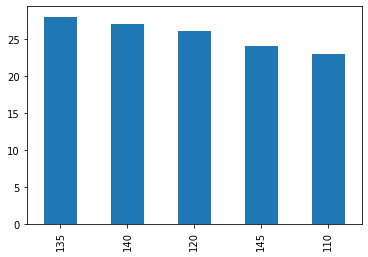

In [51]:
poke['Hp + Def'].value_counts().head(5).plot(kind = 'bar')

#### Pokemon yang memiliki Hp + Def 110 berjumlah 23, begitu seterusnya

<AxesSubplot:>

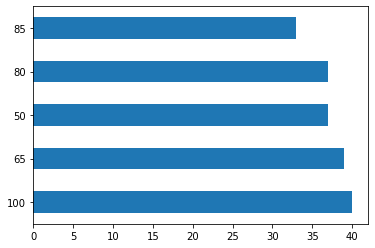

In [52]:
poke['Atk'].value_counts().head(5).plot(kind = 'barh')

In [53]:
## Pokemon yang memiliki Atk 100 berjumlah 40

<AxesSubplot:>

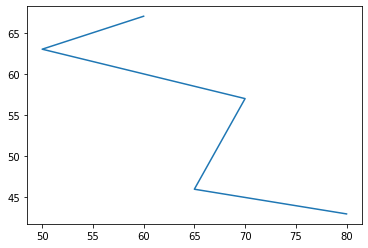

In [54]:
poke['HP'].value_counts().head(5).plot(kind = 'line')

### Pokemon dengan nilai HP Sebanyak 80 terdapat 40 pokemon, nilai HP 65 sebanyak 45, nilai HP 70 sebanyak 58, nilai HP 50 sebanyak 64, nilai HP 60 Sebanyak 67

## Kesimpulan

### Dengan Menggunakan Dataset Pokemon, Kita Dapat Melihat, Mengubah, Mengolah atau Mencari Apa yang Kita Inginkan di dalam dataset tersebut seperti contohnya melihat berapa banyak pokemon Legendaris Bertipe Psychic, serta menambahkan kolom Hp + Def untuk melihat pokemon yang mempunyai kolom Hp dan Def terbesar